# econ566 - pset04 - Dili Maduabum, Joshua Bailey

## problem 1

In [1]:
import pandas as pd
import numpy as np
reg = pd.read_csv("reg.csv")

reg.head()

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1,3.866695,-0.626454,-0.804332,0.235349,0.617922,-0.221257,0.525891,0.341334,-1.002036,...,0.791442,0.014572,0.866364,-0.160443,0.249371,-1.252015,2.315093,0.441441,0.824856,1.370865
1,2,14.616419,0.183643,-1.056526,0.244825,0.893506,0.351793,-0.487544,0.413666,0.025908,...,0.392168,1.785404,-0.947695,-0.924185,-0.335347,-0.335131,1.060380,0.413086,0.744021,0.545696
2,3,10.061252,-0.835629,-1.035396,-0.642187,-0.427756,0.160602,1.138251,0.122036,-0.448142,...,-0.472667,0.000300,0.452243,-1.556175,0.004405,0.108068,-0.397067,0.866078,-0.690097,-1.624463
3,4,17.490807,1.595281,-1.185560,-1.934809,-0.299901,-0.124052,1.215134,-1.589381,0.843233,...,-0.457952,0.435695,0.278241,0.881220,0.986768,-0.471705,0.484003,-2.261571,1.769007,-0.062473
4,5,14.639634,0.329508,-0.500440,1.038696,-0.531983,0.659874,-0.424831,-0.787439,-0.218463,...,-0.168132,-1.407645,1.417595,-0.526359,0.543576,2.507061,-1.358415,-0.178702,-0.552156,0.570213


In [2]:
#make a new dataset
n = reg.shape[0] #shape returns dimensions, shape[0] is the rows
reg2 = reg.copy() #making a copy to manipulate
ones_column = np.ones((n, 1)) #10,000 by 1 column vector of ones (for the intercept)

#inserting the 'ones' column at the 3rd column (index = 2), naming it ones
reg2.insert(loc = 2, column = 'ones', value = ones_column)

reg2.head()

,Unnamed: 0,y,ones,x1,x2,x3,x4,x5,x6,x7,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1,3.866695,1.0,-0.626454,-0.804332,0.235349,0.617922,-0.221257,0.525891,0.341334,...,0.791442,0.014572,0.866364,-0.160443,0.249371,-1.252015,2.315093,0.441441,0.824856,1.370865
1,2,14.616419,1.0,0.183643,-1.056526,0.244825,0.893506,0.351793,-0.487544,0.413666,...,0.392168,1.785404,-0.947695,-0.924185,-0.335347,-0.335131,1.060380,0.413086,0.744021,0.545696
2,3,10.061252,1.0,-0.835629,-1.035396,-0.642187,-0.427756,0.160602,1.138251,0.122036,...,-0.472667,0.000300,0.452243,-1.556175,0.004405,0.108068,-0.397067,0.866078,-0.690097,-1.624463
3,4,17.490807,1.0,1.595281,-1.185560,-1.934809,-0.299901,-0.124052,1.215134,-1.589381,...,-0.457952,0.435695,0.278241,0.881220,0.986768,-0.471705,0.484003,-2.261571,1.769007,-0.062473
4,5,14.639634,1.0,0.329508,-0.500440,1.038696,-0.531983,0.659874,-0.424831,-0.787439,...,-0.168132,-1.407645,1.417595,-0.526359,0.543576,2.507061,-1.358415,-0.178702,-0.552156,0.570213


In [12]:
# subseting y and making it a column vector
y = np.array(reg2["y"]).reshape(-1, 1) 

#all rows, column 3 and above, including a column of ones for our intercept
X = np.array(reg2.iloc[:, 2:])

# intializing beta vector
B_0 = np.zeros((21, 1)) #21 rows representing 21 features

#training error function----------------------------------------------------
def mse(X, y, beta):
    """
    Compute the mean squared error (MSE) between predicted and true target values.

    Parameters:
    - X: Input feature matrix of shape [N, p].
    - y: True target values of shape [N, 1].
    - beta: Weights vector of shape [p, 1].

    Returns:
    - mse: Mean squared error between predicted and true target values.
    """
    # Compute predicted target values
    y_pred = np.dot(X, beta)

    # Compute mean squared error
    mse = np.mean((y_pred - y) ** 2)

    return mse

#making the gradient (derivative) of the loss function (mse)----------------------------------------------------
def mse_gradient(X, y, beta):
    """
    Compute the gradient of Mean Squared Error (MSE) with respect to weights (beta).

    Given:
    - N: number of samples
    - X: input feature matrix of shape [N, p]
    - y: true target values of shape [N, 1]
    - beta: weights vector of shape [p, 1]

    Computes the gradient as:
    grad = (2 / N) * X.T * [(X * beta) - y]

    Where:
    - X.T: transpose of input feature matrix
    - X * beta: makes predicted y values
    - (X * beta - y): error between predicted and true target values
    
    returns a 21 by 1 column vector
    """
    N = X.shape[0]
    y_pred = np.dot(X, beta) 
    # X.T = 21 by 10,000 X 10,000 by 1
    mse_grad =  (2 / N) * np.dot(X.T, y_pred - y)
    return mse_grad 

# step function----------------------------------------------------
def step_1_k(k):
    return 1/(k+1) #to handle zero division error
 
#gradient descent function----------------------------------------------------
def gradient_descent(mse, mse_gradient_at_B_k, B_0, step_function, batch, X, y, epilson = 0.1, gamma = 0.9):
    k = 0 # intial value for iteration
    B_k = B_0 #intial 
    objective_function = [] #to store our mse
    
    #intial, random, indices, #from 0 to 9999, choose n random indices
    inds = np.random.choice(range(n), size=batch)
    
    #intial gradient of mse at B_k
    grad_norm_ = np.linalg.norm(mse_gradient_at_B_k(X, y, B_k)) 
    
    #while norm of the gradient is greater than epilson, update the parameter (till it is below epilson)
    while grad_norm >= epilson:

        #keeping track of the mse (training) at each iteration
        objective_function.append(mse(X, y, B_k))

        #getting the step size
        sz = step_1_k(k)

        #updating beta vector (subtracting the step size*grad_norm of the batch)
        B_k = B_k - sz * mse_gradient_at_B_k(X[inds], y[inds], B_k)

        # to count iterations it takes to converge
        k = k + 1 

        #from 0 to 9999, choose n random indices of size batch
        inds = np.random.choice(range(n), size=batch) #choose another random indices
        
        #update the gradient norm
        grad_norm = np.linalg.norm(mse_gradient_at_B_k(X, y, B_k))
        
    #return the optimal betas, the number of iterations, and the list of mse
    return B_k, k, objective_function


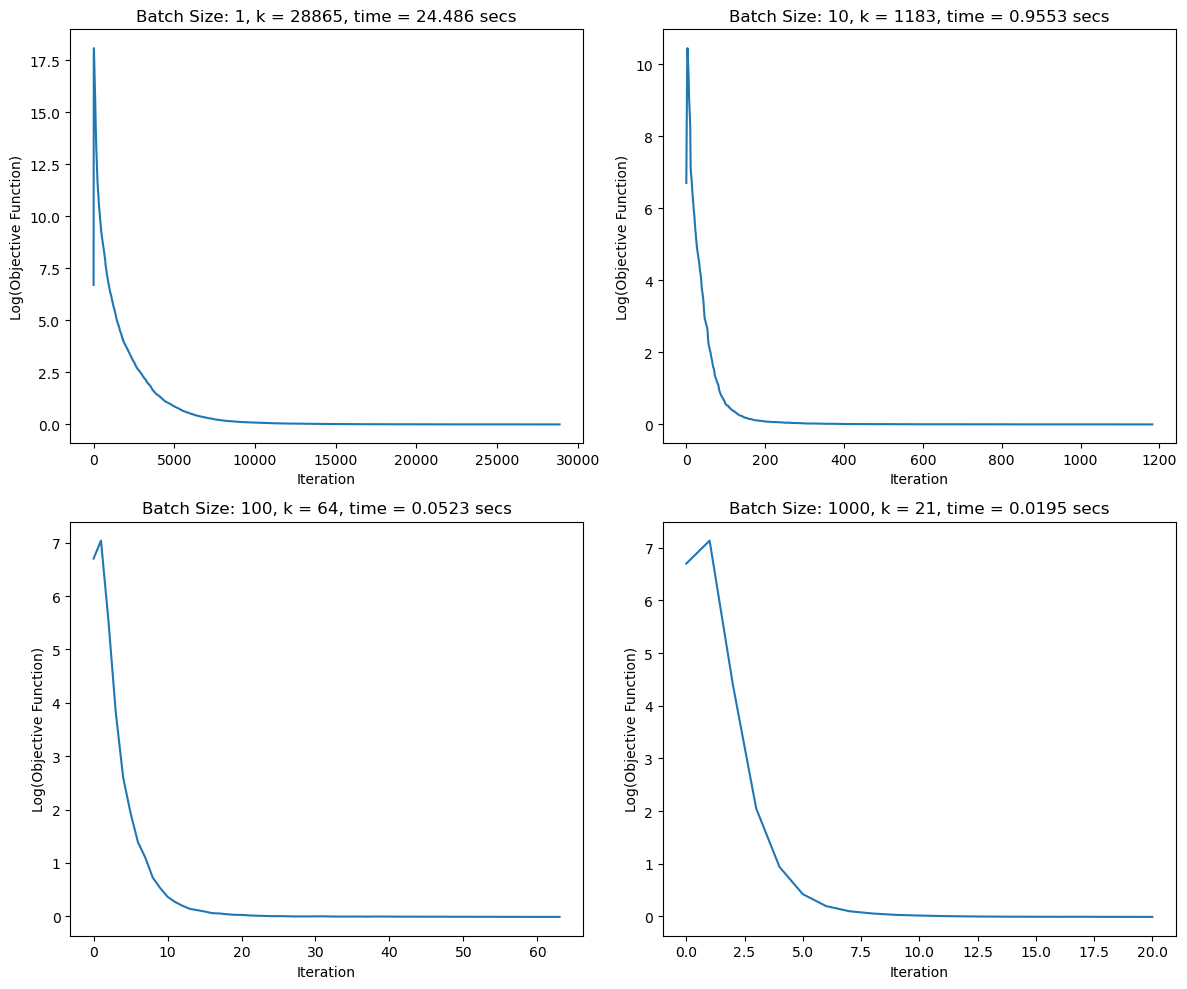

In [18]:
import matplotlib.pyplot as plt
import math
import time

batch = [1, 10, 100, 1000]

# Set a larger figure size
plt.figure(figsize=(12, 10))

for i, B in enumerate(batch, 1):
    # Record the start time
    start_time = time.time()
    
    #Takes in betas, iterations, objective functions
    Betas, iteration, obj_func = gradient_descent(mse, mse_gradient, B_0, step_1_k, B, X, y)
    
    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    
    # Create a new subplot
    plt.subplot(2, 2, i)
    
    # Plot the (logged) mse
    plt.plot(range(iteration), [math.log(i) for i in obj_func])
    plt.xlabel('Iteration')
    plt.ylabel('Log(Objective Function)')
    plt.title(f'Batch Size: {B}, k = {iteration}, time = {round(elapsed_time, 4)} secs')
    
plt.tight_layout()  # Adjust layout to prevent overlapping subplots
plt.show()

- The objective function does not decrease at every step for B = 1000. After the 2 iteration or so, it starts to decrease.

- The objective function does not decrease at every step for B = 1. We see that at the second iteration, there is sharp increase in the training error.

- The times and iterations for each batch size are shown in the plot. We can see that time decreases and iteration increases as we increase the batch size

## problem 2

## problem 3

### 3.1

**NEED ANSWER**

### 3.2

### 3.2.a

The headline is clearly based on a simple comparison of *exyr* means. This is clearly a misleading comparison because it does not account for other sources of potential heterogeneity in the groups. 

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/joshuabailey/Documents/GitHub/EconML/pset_4/soo.csv')
print(data.head())

# Calculate the mean expected years of life (exyr) for smokers and non-smokers
mean_exyr_by_smoking_status = data.groupby('smoking')['exyr'].mean()

print(mean_exyr_by_smoking_status)

   Unnamed: 0       exyr  smoking        age
0           1  47.368238        1  25.195272
1           2  11.487626        0  66.839859
2           3  28.746626        0  48.190247
3           4  37.317359        1  35.605114
4           5  26.160615        0  50.138735
smoking
0    28.788753
1    36.763548
Name: exyr, dtype: float64


### 3.2.b

Looking at mean age for smokers and non-smokers shows that the average age of non-smokers in the dataset is approximately 47.22 years, while the average age of smokers is approximately 35.54 years. This significant difference in age between smokers and non-smokers could indeed be a problem for the causal interpretation of the difference in expected years of life (exyr) observed in the previous question.

Without controlling for age, we cannot conclusively say that smoking increases life expectancy, as the observed difference might be influenced by the age composition of the groups rather than the effect of smoking itself.

In [2]:
# Calculate the mean age for smokers and non-smokers
mean_age_by_smoking_status = data.groupby('smoking')['age'].mean()

# Display the means
print(mean_age_by_smoking_status)

smoking
0    47.217696
1    35.542983
Name: age, dtype: float64


### 3.2.c

**CLEAN THIS UP**

Assumption (3) refers to the concept of conditional independence between the treatment assignment (in this case, the act of smoking, denoted as \(D\)) and the potential outcomes (\(Y(0)\) for non-smoking and \(Y(1)\) for smoking) given a covariate (\(X\), which is age in this context). In formal terms, the assumption \( (Y(0), Y(1)) \perp D \mid X \) means that once we control for age, the potential outcomes of an individual's expected years remaining are independent of whether they are a smoker or a non-smoker. This is a statement about the unconfoundedness or ignorability of the treatment assignment given age.

In simpler terms, this assumption implies that within groups of individuals of the same age, whether an individual chooses to smoke or not is as good as randomly assigned with respect to their potential outcomes in terms of expected years remaining. This means that any difference in outcomes within these age groups can be causally attributed to the effect of smoking, rather than being confounded by age.

In the context of health data and smoking, this assumption might be challenging to justify for several reasons:

1. **Other Confounding Variables**: There are likely other variables besides age that influence both the likelihood of an individual being a smoker and their expected life years. These can include factors like socioeconomic status, genetic predispositions, lifestyle choices besides smoking (e.g., diet, physical activity), environmental exposures, and more.
2. **Self-selection**: Individuals do not randomly decide to smoke or not; this decision can be influenced by various unmeasured factors that might also affect their health outcomes.

However, for the purpose of analysis and following the assumption as true, Rosenbaum and Rubin's result introduces the concept of the propensity score, \(P= E[D \mid X]\), which is the probability of being treated (smoking, in this case) conditional on covariates (age). The statement \((Y(0), Y(1)) \perp D \mid P\) implies that conditional on the propensity score, the potential outcomes are independent of the treatment assignment. This essentially means that if we can match individuals on their propensity score, we can account for all observed confounding influenced by age, thus making the groups (smokers and non-smokers) comparable in terms of their potential outcomes.

The propensity score condenses all the relevant information contained in the covariates (age, in this case) that predict treatment assignment into a single scalar, facilitating the control of confounding in observational studies. It's a powerful tool for causal inference, allowing for the estimation of treatment effects even in the presence of confounding variables, under the assumption that all relevant confounders are measured and included in the model to estimate the propensity score.


### 3.2.d

#### 3.2.d.i

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X_smokers = data[data['smoking'] == 1]['age'].values.reshape(-1, 1)
X_nonsmokers = data[data['smoking'] == 0]['age'].values.reshape(-1, 1)
y_smokers = data[data['smoking'] == 1]['exyr']
y_nonsmokers = data[data['smoking'] == 0]['exyr']

# Polynomial features
poly = PolynomialFeatures(degree=3)

# Smokers
X_smokers_poly = poly.fit_transform(X_smokers)
model_smokers = LinearRegression().fit(X_smokers_poly, y_smokers)

# Non-smokers
X_nonsmokers_poly = poly.fit_transform(X_nonsmokers)
model_nonsmokers = LinearRegression().fit(X_nonsmokers_poly, y_nonsmokers)


#### 3.2.d.ii

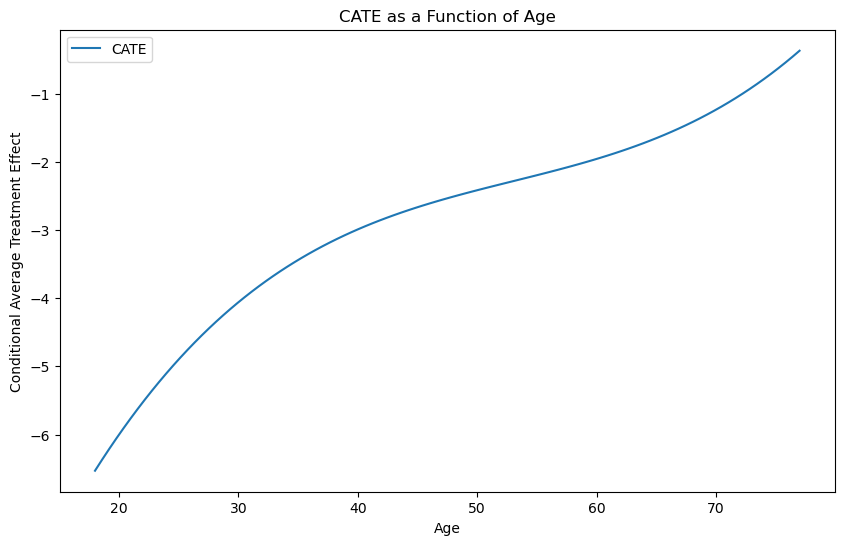

In [4]:
import matplotlib.pyplot as plt

# Generate a range of ages
ages = np.linspace(data['age'].min(), data['age'].max(), 100).reshape(-1, 1)
ages_poly = poly.transform(ages)

# Predict using the models
y_pred_smokers = model_smokers.predict(ages_poly)
y_pred_nonsmokers = model_nonsmokers.predict(ages_poly)

# Calculate CATE
cate = y_pred_smokers - y_pred_nonsmokers

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ages, cate, label='CATE')
plt.xlabel('Age')
plt.ylabel('Conditional Average Treatment Effect')
plt.title('CATE as a Function of Age')
plt.legend()
plt.show()


The plot of the Conditional Average Treatment Effect (CATE) as a function of age illustrates how the effect of smoking on expected years remaining varies across different ages. The line represents the difference in predicted life expectancy between smokers and non-smokers at various ages, based on a polynomial regression model of degree 3.

- **Treatment Effect**: If the CATE line is above zero at certain ages, it suggests that smoking is associated with an increase in expected years remaining at those ages, according to the model. Conversely, if the line is below zero, it implies a negative effect of smoking on life expectancy at those ages.
- **Heterogeneity of Treatment Effect**: The variation in the CATE across ages indicates heterogeneity in the treatment effect of smoking. This means the impact of smoking on life expectancy is not uniform across all ages; it may vary significantly depending on how old the individual is.
- **Interpretation of Treatment Effect Heterogeneity**: The observed heterogeneity could reflect biological, behavioral, or social mechanisms that make the health impact of smoking more or less severe at different life stages. For example, the cumulative effect of smoking might not manifest uniformly across all ages, or younger individuals might have a different physiological response to smoking compared to older individuals.


#### 3.2.d.iii

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_smokers = data[data['smoking'] == 1]['age'].values.reshape(-1, 1)
X_nonsmokers = data[data['smoking'] == 0]['age'].values.reshape(-1, 1)
y_smokers = data[data['smoking'] == 1]['exyr']
y_nonsmokers = data[data['smoking'] == 0]['exyr']

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_smokers_poly = poly.fit_transform(X_smokers)
model_smokers = LinearRegression().fit(X_smokers_poly, y_smokers)

X_nonsmokers_poly = poly.fit_transform(X_nonsmokers)
model_nonsmokers = LinearRegression().fit(X_nonsmokers_poly, y_nonsmokers)

# Define the kernel density estimation function with bandwidth h
def kde(a, ages, h=5):
    n = ages.size
    return (1/n) * np.sum(np.exp(-(a - ages)**2 / (2 * h**2)) / (h * np.sqrt(2 * np.pi)))

# Generate ages over the support of age in the population
a_j = np.linspace(data['age'].min(), data['age'].max(), 100)
p_hat = np.array([kde(a, data['age'], h=5) for a in a_j])

# Recalculate the predictions for smokers and non-smokers across the age range
X_a_j_poly = poly.transform(a_j.reshape(-1, 1))
f_1_a_j = model_smokers.predict(X_a_j_poly)
f_0_a_j = model_nonsmokers.predict(X_a_j_poly)

# Compute the ATE using the approximation
ate = np.sum((f_1_a_j - f_0_a_j) * p_hat) / len(a_j)

print(f"Estimated ATE: {ate}")


Estimated ATE: -0.04819040427789073


The estimated Average Treatment Effect (ATE) from part iii, approximately \(-0.048\), represents the average effect of smoking on the expected years remaining across the entire age distribution within the dataset, based on a kernel density estimation approach with a bandwidth of \(h=5\).

- **Negative ATE**: The negative value of the ATE suggests that, on average, smoking is associated with a slight decrease in the expected years remaining. This implies that, when considering the entire population in the dataset and averaging the effects across all ages, smoking has a detrimental impact on life expectancy.
- **Magnitude of the Effect**: The magnitude of the effect (\(-0.048\)) is relatively small. This could indicate that while smoking has a negative impact on life expectancy, the effect size estimated by this model and method is modest. It's important to note that this estimate is conditional on the model assumptions and the method used for estimation.
- **Use of Kernel Density Estimation**: The approach used for estimating the ATE incorporates a kernel density estimate of age to weight the contribution of each age to the overall average. This method attempts to account for the distribution of ages in the dataset, providing a more nuanced estimate of the ATE that reflects the age composition of the population.
- **Implications for Public Understanding**: Presenting a single number like the ATE to the public, as requested by The New Haven Times, simplifies the complex relationship between smoking, age, and life expectancy. While it offers a concise summary, it masks the heterogeneity and the varying impacts at different ages highlighted by the CATE analysis.

### Caveats:

- **Simplification**: The ATE provides a simplified summary of the effect of smoking across all ages, which can be useful for communication purposes but might oversimplify the nuanced reality.
- **Model Dependence**: The estimate is dependent on the accuracy and appropriateness of the model used, including the polynomial degree selected for age and the bandwidth chosen for the kernel density estimate.
- **Confounding and Bias**: As with any observational study analysis, there's a potential for confounding and bias that might influence the estimated ATE. The estimate assumes that all relevant variables are accounted for in the model, which may not be the case.

In conclusion, the ATE estimation offers a valuable summary metric for the impact of smoking on life expectancy, indicating a slight overall negative effect. However, it's crucial to remember that this single number abstracts from the detailed and varied picture captured by more comprehensive analyses, such as the CATE across different ages.

### 3.2.e

#### 3.2.e.i

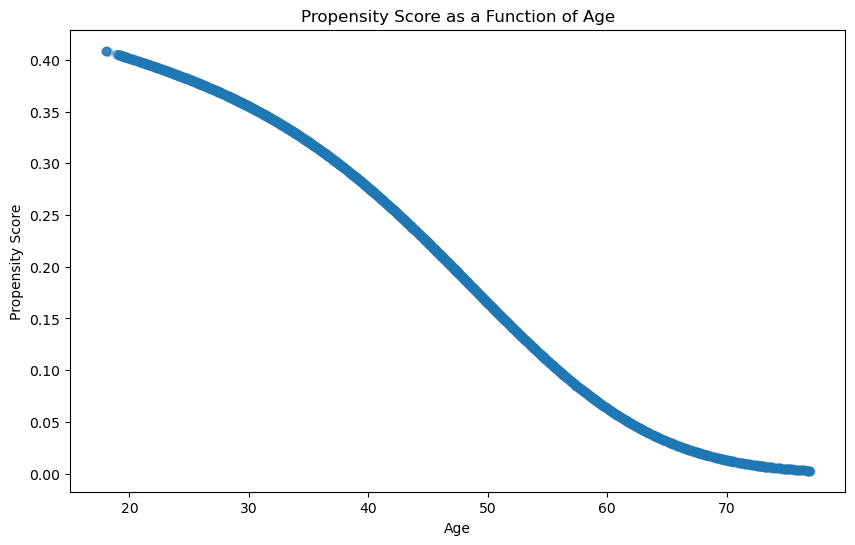

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare the third-degree polynomial features of age
poly = PolynomialFeatures(degree=3)
X_age_poly = poly.fit_transform(data['age'].values.reshape(-1, 1))
D = data['smoking']

# Fit a logistic regression model for propensity score estimation
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_age_poly, D)

# Predict the propensity scores
propensity_scores = logistic_model.predict_proba(X_age_poly)[:, 1]

# Plot the propensity scores as a function of age
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], propensity_scores, alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Propensity Score')
plt.title('Propensity Score as a Function of Age')
plt.show()

The plot shows the propensity score, which represents the conditional probability of an individual being a smoker given their age, approximated using a third-degree polynomial model. The propensity scores vary across different ages, indicating how the likelihood of smoking changes with age.

- **Variation in Propensity Score**: The plot reveals that the propensity to smoke is not uniform across ages, suggesting that certain age groups are more likely to smoke than others. This variation could reflect demographic, social, or health-related trends that influence smoking behavior.
- **Use of Third-Degree Polynomial**: The model captures non-linear relationships between age and the likelihood of smoking, allowing for a more nuanced understanding of how smoking propensity changes with age.


#### 3.2.e.ii

In [7]:
from sklearn.linear_model import LinearRegression

# Prepare the data with propensity scores as an additional covariate
X_with_p = np.hstack([D.values.reshape(-1, 1), propensity_scores.reshape(-1, 1)])
Y = data['exyr'].values

# Fit a linear regression model to estimate the effect of D on Y, controlling for P
model_with_p = LinearRegression().fit(X_with_p, Y)

# Extract the coefficients 
intercept, coef_D, coef_P = model_with_p.intercept_, model_with_p.coef_[0], model_with_p.coef_[1]

print(f"Intercept: {intercept}, Coefficient for D (smoking): {coef_D}, Coefficient for P (propensity score): {coef_P}")


Intercept: 6.063699533633216, Coefficient for D (smoking): -3.5501144950946353, Coefficient for P (propensity score): 114.09683841956625


When replacing age (\(X\)) with the propensity score (\(P\)) in the analysis:

- **Differences Observed**: The use of propensity scores aims to control for confounding by summarizing all observed covariates (in this case, age) that influence treatment assignment into a single metric. This can potentially provide a clearer insight into the causal effect of smoking by balancing the observed covariates across treatment groups.
- **Preference**: The preference between using \(X\) directly or the propensity score (\(P\)) depends on the analysis's context and objectives. The propensity score approach is particularly beneficial when there are multiple covariates to control for, as it simplifies the control of confounding into a single dimension. However, it requires careful consideration of the model used for the propensity score estimation and how well it captures the treatment assignment mechanism.
- **Impact of Multiple \(X\)'s**: With multiple covariates (\(X\)'s), the propensity score becomes even more valuable as it compresses all the covariates' confounding effects into a single score, simplifying the analysis and potentially reducing the dimensionality bias.

- **Intercept (6.06)**: This value represents the expected value of the dependent variable (expected years remaining, \(Y\)) when both the smoking status (\(D\)) and the propensity score (\(P\)) are 0. Given the nature of the variables, especially the propensity score, this interpretation is more theoretical than practical, as \(P\) cannot be 0 in the context of this analysis.
  
- **Coefficient for \(D\) (smoking) (-3.55)**: This coefficient indicates that, controlling for the propensity score (\(P\)), being a smoker is associated with a decrease of approximately 3.55 years in the expected years remaining compared to non-smokers. This is a substantial negative impact, highlighting the detrimental effect of smoking on life expectancy in the dataset, after adjusting for the likelihood of being a smoker as captured by the propensity score.

- **Coefficient for \(P\) (propensity score) (114.10)**: This large positive coefficient suggests that as the propensity to smoke increases (which is modeled as a function of age in this case), the expected years remaining increases significantly. This result might seem counterintuitive at first, especially considering the negative connotations associated with smoking. However, it reflects the complex relationship encoded in the propensity score, which captures not just the direct effect of age but also the modeled likelihood of smoking. The positive sign could be indicative of underlying patterns in the data where age, or factors associated with a higher propensity to smoke, are positively correlated with longer life expectancy, when controlling for actual smoking behavior.


#### 3.2.e.iii

In [8]:
from scipy.spatial import cKDTree
import numpy as np

# Separate datasets for smokers and non-smokers
smokers = data[data['smoking'] == 1]
nonsmokers = data[data['smoking'] == 0]

# Use cKDTree for fast nearest neighbor search based on age
tree = cKDTree(nonsmokers[['age']].values)

# Find the closest non-smoker in age for each smoker
distances, indices = tree.query(smokers[['age']].values, k=1)

# Calculate the difference in expected years remaining for matched pairs
matched_diffs = smokers['exyr'].values - nonsmokers.iloc[indices]['exyr'].values

# Compute the ATE as the average of these differences
ate_matching = np.mean(matched_diffs)

print(f"Estimated ATE from matching: {ate_matching}")

Estimated ATE from matching: -3.6836797551246296


The Average Treatment Effect (ATE) estimated through the matching approach, comparing each smoking individual to the closest (in age) non-smoking individual, is approximately \(-3.68\). This suggests that, on average, smoking is associated with a decrease of about 3.68 years in the expected remaining life years, based on this specific age-matched comparison.

Matching each smoking individual to the closest (in age) non-smoking individual to approximate the CATE for specific ages involves a direct comparison that doesn't rely on modeling assumptions to the same extent. This can provide a more intuitive and direct method of estimating the causal effect of smoking on life expectancy.

- **Differences Noticed**: This matching approach might yield different insights compared to regression-based methods because it directly compares individuals who are similar in age but differ in their smoking status. It can potentially reveal more localized treatment effects but might be more sensitive to the availability and selection of match pairs.
- **Preference**: The preference between regression-based control for propensity scores and direct matching can depend on the research question, the distribution of covariates, and the treatment variable in the population. Matching is appealing for its simplicity and directness but may not always be practical or sufficient when there are multiple relevant covariates or when exact matches are hard to find.
- **Comparison and Choice**: While matching provides a clear and straightforward way to estimate causal effects, its effectiveness relies heavily on the ability to find close matches for all treated individuals, which can be challenging in heterogeneous populations or when considering multiple covariates. Regression methods that control for propensity scores offer a more flexible and comprehensive way to adjust for confounders, especially in more complex scenarios.



## problem 4

In [19]:
rd = pd.read_csv("rd.csv")

rd.head()

,Unnamed: 0,Y,R
0,1,0.055582,0.001315
1,2,-0.031362,0.001837
2,3,-0.251850,0.001933
3,4,0.071840,0.004766
4,5,0.337993,0.008128


### 4.1

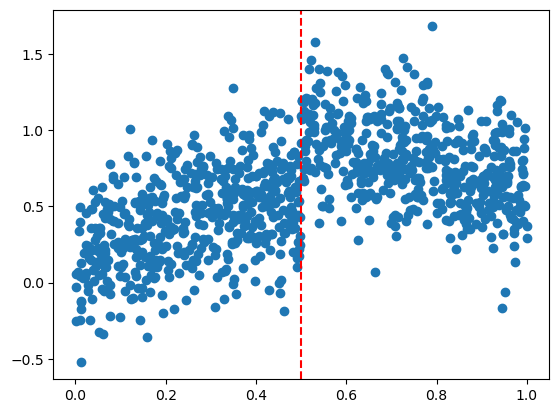

In [20]:
#plot data points
plt.scatter(rd['R'], rd['Y'])

# Add a vertical line at x = 0.5
plt.axvline(x=0.5, color='red', linestyle='--')
plt.show()

Yes there is a jump at R = 0.5

### 4.2

In [37]:
from sklearn.linear_model import LinearRegression #for
#subsetting the data 
rd_top_half = rd[rd['R'] > 0.5]
rd_bttm_half = rd[rd['R'] < 0.5]

#getting the top Y's
Y_top = rd_top_half['Y']
R_top = rd_top_half['R']

#getting the bottom Y's
Y_bttm = rd_bttm_half['Y']
R_bttm = rd_bttm_half['R']

# Initialize the linear regression model
model_top = LinearRegression()
model_bttm = LinearRegression()

# Fit the model to the data
model_top.fit(R_top, Y_top)
model_bttm.fit(R_bttm, Y_bttm)

# Get the coefficients
coef_top = model_top.coef_
coef_bttm = model_top.coef_

# Get the intercepts
intercept_top = model_top.intercept_
intercept_bttm = model_bttm.intercept_


In [40]:
from sklearn.linear_model import LinearRegression

# Subsetting the data 
rd_top_half = rd[rd['R'] > 0.5]
rd_bttm_half = rd[rd['R'] < 0.5]

# Getting the top Y's and R's
Y_top = rd_top_half['Y']
R_top = rd_top_half['R']

# Getting the bottom Y's and R's
Y_bttm = rd_bttm_half['Y']
R_bttm = rd_bttm_half['R']

# Initialize the linear regression model
model_top = LinearRegression()
model_bttm = LinearRegression()

# Fit the model to the data
model_top.fit(R_top.values.reshape(-1, 1), Y_top)
model_bttm.fit(R_bttm.values.reshape(-1, 1), Y_bttm)

# Get the coefficients
coef_top = model_top.coef_[0]
coef_bttm = model_bttm.coef_[0]

# Get the intercepts
intercept_top = model_top.intercept_
intercept_bttm = model_bttm.intercept_

# Print the regression estimates nicely
print("Regression Estimates for the Top Half:")
print(f"Intercept: {intercept_top}")
print(f"Coefficient: {coef_top}")


print("\nRegression Estimates for the Bottom Half:")
print(f"Intercept: {intercept_bttm}")
print(f"Coefficient: {coef_bttm}")


Regression Estimates for the Top Half:
Intercept: 1.3905155487767789
Coefficient: -0.7844071613960157

Regression Estimates for the Bottom Half:
Intercept: 0.18752337332955235
Coefficient: 0.8693471093600094
